**1. Late night sports analysis**

*Problem:*
A regional sports network is currently paying editors and analysts overtime after each game to produce same-day video analysis for their web properties. This overtime is costly and while some videos do gain lots of views, others do not.

What factors influence the popularity of these videos produced and published immediately after games? Importantly, can some of the analysis wait until the next morning?

*Target Variable:*
Editorial Video Plays reported in Google Analytics for game related content posted after the game played between the end of the game and the next morning.

*Benefit:*
If we could predict the value of producing this video in terms of plays that same night, we could recommend for or against paying analysts overtime versus finishing the work in the morning.

*Features:*
We would want to consider at least:
- wins versus losses,
- the record of the teams entering the game,
- if the game went to an overtime,
- the score of the game,
- the category of the video,
- home v. away games,
- the date of the game.

*Goals:*
We aim to hold video plays steady while reducing overtime costs.

*Risks and limitations:*
It is not clear that these factors correlate with a difference in videos plays for same-day game related content. We will also need to use multiple data sets in order to add all of these factors. FiveThirtyEight Elo score would have been a great addition, but their dataset contains no data for this year.

There may also be a risk that other factors like individual player records being broken, in-game fights or off-court storylines play a large role in the popularity of videos. However, this system will be a tool for a more data-informed decision at the end of games and human decision making can take these factors into account.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
videos = pd.read_csv('./data/Knicks_Videos_2.csv')
videos.head()

,Date,Hour,Custom dimension 2,Custom dimension 10,Custom dimension 5,Custom dimension 3,Total events
0,2018-10-17,0,5848208685001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1
1,2018-10-17,0,5848212795001,Highlight Package,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1
2,2018-10-17,0,5848245394001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks at Nets 2018-10-03,1
3,2018-10-17,1,5848217072001,Highlight Clip,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1
4,2018-10-17,1,5848219492001,Highlights Analysis,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1


In [3]:
videos.dtypes

Date                   object
Hour                    int64
Custom dimension 2      int64
Custom dimension 10    object
Custom dimension 5     object
Custom dimension 3     object
Total events            int64
dtype: object

In [4]:
videos.shape

(12903, 7)

In [5]:
videos.isnull().sum()

Date                   0
Hour                   0
Custom dimension 2     0
Custom dimension 10    0
Custom dimension 5     0
Custom dimension 3     0
Total events           0
dtype: int64

In [6]:
videos.columns = ['Play_Date', 'Hour', 'Video_ID', 'Category', 'Personalities', 'Game_Tax', 'Video_Plays']

videos.head()

,Play_Date,Hour,Video_ID,Category,Personalities,Game_Tax,Video_Plays
0,2018-10-17,0,5848208685001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1
1,2018-10-17,0,5848212795001,Highlight Package,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1
2,2018-10-17,0,5848245394001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks at Nets 2018-10-03,1
3,2018-10-17,1,5848217072001,Highlight Clip,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1
4,2018-10-17,1,5848219492001,Highlights Analysis,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1


In [7]:
videos.loc[:, 'Game_Date'] = videos.loc[:, 'Game_Tax'].str.slice(-10,)

videos.head()

,Play_Date,Hour,Video_ID,Category,Personalities,Game_Tax,Video_Plays,Game_Date
0,2018-10-17,0,5848208685001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12
1,2018-10-17,0,5848212795001,Highlight Package,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12
2,2018-10-17,0,5848245394001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks at Nets 2018-10-03,1,2018-10-03
3,2018-10-17,1,5848217072001,Highlight Clip,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12
4,2018-10-17,1,5848219492001,Highlights Analysis,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12


In [8]:
videos.loc[:, 'Game_Detail'] = videos.loc[:, 'Game_Tax'].str.slice(0,-11)

videos.head()

,Play_Date,Hour,Video_ID,Category,Personalities,Game_Tax,Video_Plays,Game_Date,Game_Detail
0,2018-10-17,0,5848208685001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets
1,2018-10-17,0,5848212795001,Highlight Package,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets
2,2018-10-17,0,5848245394001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks at Nets 2018-10-03,1,2018-10-03,Knicks at Nets
3,2018-10-17,1,5848217072001,Highlight Clip,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets
4,2018-10-17,1,5848219492001,Highlights Analysis,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets


In [9]:
videos.loc[:, 'Opponent'] = videos.loc[:, 'Game_Detail'].str.slice(9,)

videos.head()

,Play_Date,Hour,Video_ID,Category,Personalities,Game_Tax,Video_Plays,Game_Date,Game_Detail,Opponent
0,2018-10-17,0,5848208685001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets,Nets
1,2018-10-17,0,5848212795001,Highlight Package,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets,Nets
2,2018-10-17,0,5848245394001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks at Nets 2018-10-03,1,2018-10-03,Knicks at Nets,Nets
3,2018-10-17,1,5848217072001,Highlight Clip,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets,Nets
4,2018-10-17,1,5848219492001,Highlights Analysis,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets,Nets


In [10]:
videos.loc[:, 'Play_Date'] = pd.to_datetime(videos.loc[:, 'Play_Date'])
videos.loc[:, 'Game_Date'] = pd.to_datetime(videos.loc[:, 'Game_Date'])
print(videos.head())
print(videos.dtypes)

   Play_Date  Hour       Video_ID             Category  \
0 2018-10-17     0  5848208685001       Highlight Clip   
1 2018-10-17     0  5848212795001    Highlight Package   
2 2018-10-17     0  5848245394001  Highlights Analysis   
3 2018-10-17     1  5848217072001       Highlight Clip   
4 2018-10-17     1  5848219492001  Highlights Analysis   

                            Personalities                   Game_Tax  \
0  Al Trautwig,Alan Hahn,Wally Szczerbiak  Knicks vs Nets 2018-10-12   
1  Al Trautwig,Alan Hahn,Wally Szczerbiak  Knicks vs Nets 2018-10-12   
2  Al Trautwig,Alan Hahn,Wally Szczerbiak  Knicks at Nets 2018-10-03   
3              Alan Hahn,Wally Szczerbiak  Knicks vs Nets 2018-10-12   
4              Alan Hahn,Wally Szczerbiak  Knicks vs Nets 2018-10-12   

   Video_Plays  Game_Date     Game_Detail Opponent  
0            1 2018-10-12  Knicks vs Nets     Nets  
1            1 2018-10-12  Knicks vs Nets     Nets  
2            1 2018-10-03  Knicks at Nets     Nets  
3     

In [11]:
videos.loc[:, 'Day_After_Game'] = videos.loc[:, 'Game_Date'] + pd.DateOffset(1)
videos.head()

,Play_Date,Hour,Video_ID,Category,Personalities,Game_Tax,Video_Plays,Game_Date,Game_Detail,Opponent,Day_After_Game
0,2018-10-17,0,5848208685001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets,Nets,2018-10-13
1,2018-10-17,0,5848212795001,Highlight Package,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets,Nets,2018-10-13
2,2018-10-17,0,5848245394001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks at Nets 2018-10-03,1,2018-10-03,Knicks at Nets,Nets,2018-10-04
3,2018-10-17,1,5848217072001,Highlight Clip,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets,Nets,2018-10-13
4,2018-10-17,1,5848219492001,Highlights Analysis,"Alan Hahn,Wally Szczerbiak",Knicks vs Nets 2018-10-12,1,2018-10-12,Knicks vs Nets,Nets,2018-10-13


In [12]:
Target_Video_Plays = videos.loc[((
    videos.loc[:, 'Play_Date'] == videos.loc[:, 'Day_After_Game']) & (
    videos.loc[:, 'Hour'] < 9)) | (
    videos.loc[:, 'Play_Date'] == videos.loc[:, 'Game_Date']), :]
print(Target_Video_Plays.shape)
print(Target_Video_Plays.head())

(5287, 11)
    Play_Date  Hour       Video_ID             Category  \
38 2018-10-17    22  5844106048001       Highlight Clip   
39 2018-10-17    22  5844106048001       Highlight Clip   
43 2018-10-17    22  5848516112001     Player Interview   
44 2018-10-17    22  5848522853001     Player Interview   
45 2018-10-17    22  5848694765001  Highlights Analysis   

                             Personalities                    Game_Tax  \
38  Al Trautwig,Alan Hahn,Wally Szczerbiak  Knicks vs Hawks 2018-10-17   
39                         Rebecca Haarlow  Knicks vs Hawks 2018-10-17   
43                         Rebecca Haarlow  Knicks vs Hawks 2018-10-17   
44                         Rebecca Haarlow  Knicks vs Hawks 2018-10-17   
45  Al Trautwig,Alan Hahn,Wally Szczerbiak  Knicks vs Hawks 2018-10-17   

    Video_Plays  Game_Date      Game_Detail Opponent Day_After_Game  
38            2 2018-10-17  Knicks vs Hawks    Hawks     2018-10-18  
39            2 2018-10-17  Knicks vs Hawks    Ha

In [13]:
Video_ID_Sum = Target_Video_Plays.groupby('Video_ID')['Video_Plays'].sum()
Video_ID_Sum

Video_ID
5450217995001     1
5450266286001     1
5450279763001     1
5450376272001     1
5450391556001     1
5450471929001     1
5450481706001     1
5450562754001     1
5450584470001     1
5450604889001     1
5450655195001     1
5480140624001     1
5481810792001     1
5481816629001     1
5482025582001     1
5542138551001     1
5583610468001     1
5597324874001     1
5603557992001     1
5606009501001     1
5639907638001     1
5639919442001     1
5645423073001     1
5654074136001     1
5674016332001     1
5675147578001     1
5684324962001     1
5686886195001     1
5691088335001     1
5692772500001     1
                 ..
5990726805001     3
5990732302001     4
5992077086001     1
5992078525001     3
5992079143001     7
5992081982001     1
5992083483001     1
5992083985001    16
5994170971001    26
5994175389001    40
5994179113001     7
5994179295001    10
5995221716001     2
5995222347001     7
5995222360001     1
5995227422001     3
5995227516001     2
5995227661001     2
59956454550

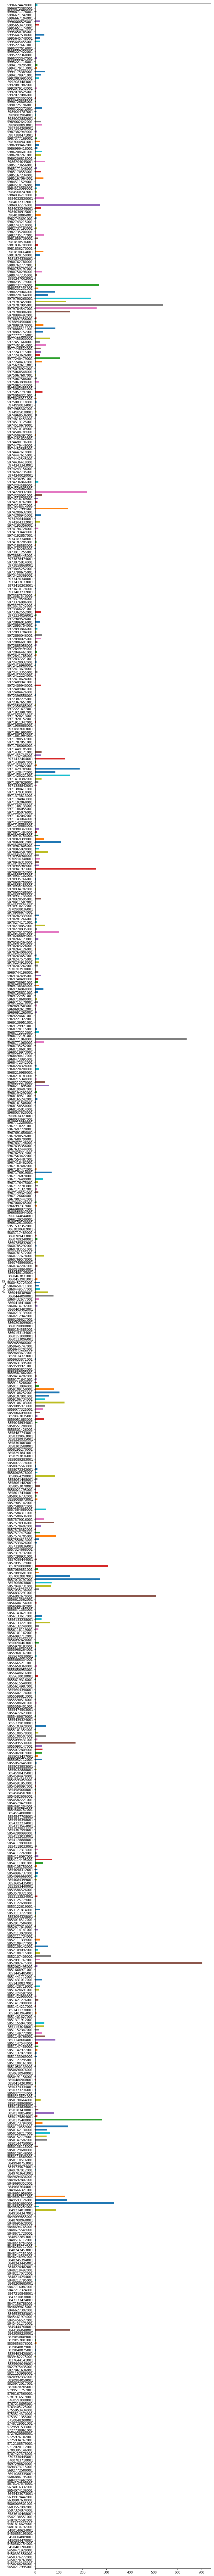

In [14]:
ax = Video_ID_Sum.plot(kind='BarH', x='Video_Name', y='Video_Plays', figsize=(10,150))

In [15]:
Video_ID_Sum.describe()

count    769.000000
mean      18.503251
std       56.861837
min        1.000000
25%        1.000000
50%        3.000000
75%       12.000000
max      705.000000
Name: Video_Plays, dtype: float64

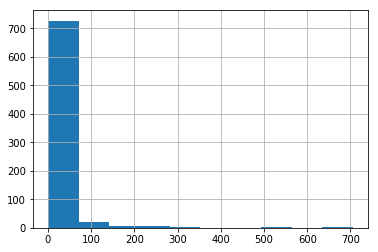

In [16]:
Video_ID_Sum.hist();

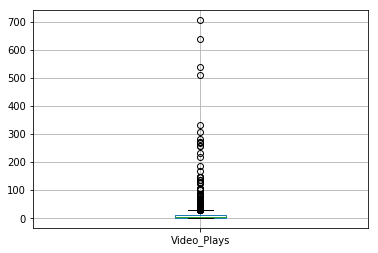

In [17]:
Video_ID_Sum = Video_ID_Sum.to_frame()

Video_ID_Sum.boxplot();

In [18]:
Games_Data = pd.read_csv('./data/Knicks_Results.csv')
Games_Data

,Game_Index,Date,Start_Time,Away_Old,Away,Opponent,Win_Loss,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak,Streak_Clean
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,126,107,19,1,0,1,W 1,1
1,2,Fri Oct 19 2018,7:30p,@,1,Nets,L,1,0,0,105,107,-2,1,1,0,L 1,-1
2,3,Sat Oct 20 2018,7:30p,NaN,0,Celtics,L,1,1,0,101,103,-2,1,2,-1,L 2,-2
3,4,Mon Oct 22 2018,8:00p,@,1,Bucks,L,1,1,0,113,124,-11,1,3,-2,L 3,-3
4,5,Wed Oct 24 2018,7:30p,@,1,Heat,L,1,1,0,87,110,-23,1,4,-3,L 4,-4
5,6,Fri Oct 26 2018,7:30p,NaN,0,Warriors,L,1,1,0,100,128,-28,1,5,-4,L 5,-5
6,7,Mon Oct 29 2018,7:30p,NaN,0,Nets,W,0,1,0,115,96,19,2,5,-3,W 1,1
7,8,Wed Oct 31 2018,8:00p,NaN,0,Pacers,L,1,0,0,101,107,-6,2,6,-4,L 1,-1
8,9,Fri Nov 2 2018,8:30p,@,1,Mavericks,W,0,1,0,118,106,12,3,6,-3,W 1,1
9,10,Sun Nov 4 2018,6:00p,@,1,Wizards,L,1,0,0,95,108,-13,3,7,-4,L 1,-1


In [19]:
Opponent_Elo = pd.read_csv('./data/MSGN_Carmello_Elo.csv')
Opponent_Elo.head()

,Elo,Team,Record,Playoffs,Finals,Champion
0,1802,Warriors,61-21,>99%,74%,61%
1,1696,Thunder,53-29,>99%,13%,8%
2,1690,Raptors,59-23,>99%,37%,12%
3,1678,Rockets,50-32,99%,6%,3%
4,1672,Celtics,53-29,>99%,20%,4%


In [20]:
Opponent_Elo.columns = ['Elo', 'Opponent', 'Opponent_Record', 'Playoffs', 'Finals', 'Champion']

Opponent_Elo.head()

,Elo,Opponent,Opponent_Record,Playoffs,Finals,Champion
0,1802,Warriors,61-21,>99%,74%,61%
1,1696,Thunder,53-29,>99%,13%,8%
2,1690,Raptors,59-23,>99%,37%,12%
3,1678,Rockets,50-32,99%,6%,3%
4,1672,Celtics,53-29,>99%,20%,4%


In [21]:
Game_Data_Elo = pd.merge(Games_Data, Opponent_Elo)

Game_Data_Elo.head()

,Game_Index,Date,Start_Time,Away_Old,Away,Opponent,Win_Loss,Loss,Loss_n-1,Overtime,...,Total_Wins,Total_Loss,Record_Net,Streak,Streak_Clean,Elo,Opponent_Record,Playoffs,Finals,Champion
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,1,0,1,W 1,1,1340,27-55,<1%,<1%,<1%
1,12,Wed Nov 7 2018,7:30p,@,1,Hawks,W,0,1,0,...,4,8,-4,W 1,1,1340,27-55,<1%,<1%,<1%
2,34,Fri Dec 21 2018,7:30p,NaN,0,Hawks,L,1,1,0,...,9,25,-16,L 4,-4,1340,27-55,<1%,<1%,<1%
3,2,Fri Oct 19 2018,7:30p,@,1,Nets,L,1,0,0,...,1,1,0,L 1,-1,1466,39-43,83%,<1%,<1%
4,7,Mon Oct 29 2018,7:30p,NaN,0,Nets,W,0,1,0,...,2,5,-3,W 1,1,1466,39-43,83%,<1%,<1%


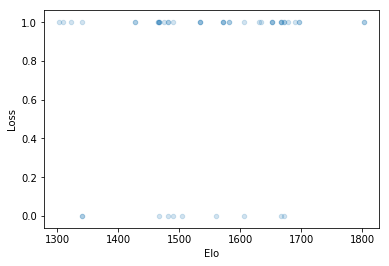

In [22]:
Game_Data_Elo.plot(kind='Scatter', x='Elo', y='Loss', alpha=.2);

In [23]:
Game_Data_Elo.loc[:, 'Game_Date'] = pd.to_datetime(Game_Data_Elo.loc[:, 'Date'], format='%a %b %d %Y')

Game_Data_Elo

,Game_Index,Date,Start_Time,Away_Old,Away,Opponent,Win_Loss,Loss,Loss_n-1,Overtime,...,Total_Loss,Record_Net,Streak,Streak_Clean,Elo,Opponent_Record,Playoffs,Finals,Champion,Game_Date
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,0,1,W 1,1,1340,27-55,<1%,<1%,<1%,2018-10-17
1,12,Wed Nov 7 2018,7:30p,@,1,Hawks,W,0,1,0,...,8,-4,W 1,1,1340,27-55,<1%,<1%,<1%,2018-11-07
2,34,Fri Dec 21 2018,7:30p,NaN,0,Hawks,L,1,1,0,...,25,-16,L 4,-4,1340,27-55,<1%,<1%,<1%,2018-12-21
3,2,Fri Oct 19 2018,7:30p,@,1,Nets,L,1,0,0,...,1,0,L 1,-1,1466,39-43,83%,<1%,<1%,2018-10-19
4,7,Mon Oct 29 2018,7:30p,NaN,0,Nets,W,0,1,0,...,5,-3,W 1,1,1466,39-43,83%,<1%,<1%,2018-10-29
5,27,Sat Dec 8 2018,7:30p,NaN,0,Nets,L,1,1,0,...,19,-11,L 3,-3,1466,39-43,83%,<1%,<1%,2018-12-08
6,47,Fri Jan 25 2019,7:30p,@,1,Nets,L,1,1,0,...,37,-27,L 8,-8,1466,39-43,83%,<1%,<1%,2019-01-25
7,3,Sat Oct 20 2018,7:30p,NaN,0,Celtics,L,1,1,0,...,2,-1,L 2,-2,1672,53-29,>99%,20%,4%,2018-10-20
8,19,Wed Nov 21 2018,7:30p,@,1,Celtics,W,0,1,0,...,14,-9,W 1,1,1672,53-29,>99%,20%,4%,2018-11-21
9,26,Thu Dec 6 2018,8:00p,@,1,Celtics,L,1,1,0,...,18,-10,L 2,-2,1672,53-29,>99%,20%,4%,2018-12-06


In [24]:
Full_Game_Video = pd.merge(Game_Data_Elo, Target_Video_Plays, on='Game_Date')

Full_Game_Video

,Game_Index,Date,Start_Time,Away_Old,Away,Opponent_x,Win_Loss,Loss,Loss_n-1,Overtime,...,Play_Date,Hour,Video_ID,Category,Personalities,Game_Tax,Video_Plays,Game_Detail,Opponent_y,Day_After_Game
0,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5844106048001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Hawks 2018-10-17,2,Knicks vs Hawks,Hawks,2018-10-18
1,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5844106048001,Highlight Clip,Rebecca Haarlow,Knicks vs Hawks 2018-10-17,2,Knicks vs Hawks,Hawks,2018-10-18
2,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5848516112001,Player Interview,Rebecca Haarlow,Knicks vs Hawks 2018-10-17,1,Knicks vs Hawks,Hawks,2018-10-18
3,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5848522853001,Player Interview,Rebecca Haarlow,Knicks vs Hawks 2018-10-17,1,Knicks vs Hawks,Hawks,2018-10-18
4,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5848694765001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Hawks 2018-10-17,2,Knicks vs Hawks,Hawks,2018-10-18
5,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5848694765001,Player Interview,Rebecca Haarlow,Knicks vs Hawks 2018-10-17,1,Knicks vs Hawks,Hawks,2018-10-18
6,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5848695628001,Player Interview,Rebecca Haarlow,Knicks vs Hawks 2018-10-17,1,Knicks vs Hawks,Hawks,2018-10-18
7,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5848700960001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Hawks 2018-10-17,1,Knicks vs Hawks,Hawks,2018-10-18
8,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5849099855001,Player Interview,Rebecca Haarlow,Knicks vs Hawks 2018-10-17,1,Knicks vs Hawks,Hawks,2018-10-18
9,1,Wed Oct 17 2018,7:30p,NaN,0,Hawks,W,0,0,0,...,2018-10-17,22,5849104347001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",Knicks vs Hawks 2018-10-17,1,Knicks vs Hawks,Hawks,2018-10-18


In [25]:
Full_Game_Video.shape

(5287, 34)

In [26]:
Full_Game_Video.dtypes

Game_Index                  int64
Date                       object
Start_Time                 object
Away_Old                   object
Away                        int64
Opponent_x                 object
Win_Loss                   object
Loss                        int64
Loss_n-1                    int64
Overtime                    int64
Tm_Score                    int64
Opp_Score                   int64
Score_Net                   int64
Total_Wins                  int64
Total_Loss                  int64
Record_Net                  int64
Streak                     object
Streak_Clean                int64
Elo                         int64
Opponent_Record            object
Playoffs                   object
Finals                     object
Champion                   object
Game_Date          datetime64[ns]
Play_Date          datetime64[ns]
Hour                        int64
Video_ID                    int64
Category                   object
Personalities              object
Game_Tax      

In [27]:
Full_Game_Video.isnull().sum()

Game_Index            0
Date                  0
Start_Time            0
Away_Old           2271
Away                  0
Opponent_x            0
Win_Loss              0
Loss                  0
Loss_n-1              0
Overtime              0
Tm_Score              0
Opp_Score             0
Score_Net             0
Total_Wins            0
Total_Loss            0
Record_Net            0
Streak                0
Streak_Clean          0
Elo                   0
Opponent_Record       0
Playoffs              0
Finals                0
Champion              0
Game_Date             0
Play_Date             0
Hour                  0
Video_ID              0
Category              0
Personalities         0
Game_Tax              0
Video_Plays           0
Game_Detail           0
Opponent_y            0
Day_After_Game        0
dtype: int64

Lets get rid of the Away_Old Column, and while we're at it, Win_Loss, Streak, Playoffs, Finals, Champion also

In [28]:
Full_Game_Video.drop(['Away_Old', 'Win_Loss', 'Streak', 'Playoffs', 'Finals', 'Champion'], axis='columns', inplace=True)

Importantly, Hour and Play_Date and others have played their part in filtering the data down, but now we want to combine rows so we get one row for each video. Let's drop those now.

In [29]:
Full_Game_Video.drop(['Hour', 'Play_Date', 'Date', 'Opponent_y', 'Game_Tax', 'Game_Detail', 'Day_After_Game'], axis='columns', inplace=True)

In [30]:
Full_Game_Video.columns

Index(['Game_Index', 'Start_Time', 'Away', 'Opponent_x', 'Loss', 'Loss_n-1',
       'Overtime', 'Tm_Score', 'Opp_Score', 'Score_Net', 'Total_Wins',
       'Total_Loss', 'Record_Net', 'Streak_Clean', 'Elo', 'Opponent_Record',
       'Game_Date', 'Video_ID', 'Category', 'Personalities', 'Video_Plays'],
      dtype='object')

In [31]:
Video_ID_Sum = Full_Game_Video.groupby('Video_ID')['Video_Plays'].sum().to_frame()
Video_ID_Sum

,Video_Plays
Video_ID,
5450217995001,1
5450266286001,1
5450279763001,1
5450376272001,1
5450391556001,1
5450471929001,1
5450481706001,1
5450562754001,1
5450584470001,1


In [32]:
Total_Plays_Clean = pd.merge(Full_Game_Video, Video_ID_Sum, on='Video_ID')

Total_Plays_Clean

,Game_Index,Start_Time,Away,Opponent_x,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,...,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Video_ID,Category,Personalities,Video_Plays_x,Video_Plays_y
0,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",2,148
1,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Highlight Clip,Rebecca Haarlow,2,148
2,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Coach Interview,Rebecca Haarlow,1,148
3,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Highlight Clip,"Al Trautwig,Alan Hahn,Wally Szczerbiak",21,148
4,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Highlight Clip,"Alan Hahn,Wally Szczerbiak",1,148
5,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Highlight Clip,Rebecca Haarlow,3,148
6,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Highlights Analysis,"Al Trautwig,Alan Hahn,Wally Szczerbiak",39,148
7,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Highlights Analysis,"Alan Hahn,Wally Szczerbiak",4,148
8,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Player Interview,"Al Trautwig,Alan Hahn,Wally Szczerbiak",5,148
9,1,7:30p,0,Hawks,0,0,0,126,107,19,...,1,1,1340,27-55,2018-10-17,5844106048001,Player Interview,Rebecca Haarlow,4,148


Here we learn that much of the Google Analytics data is tainted becauase GA was pulling up Personality, Category and other data from the page on which the video played rather than the video itself. These might be valuable if our model needs to decrease bias in the future, but we would need to get an index of the real data for these from the Video Player (Brightcove). For now we will drop those columns.

In [33]:
Total_Plays_Clean.drop(['Category', 'Personalities'], axis='columns', inplace=True)

In [34]:
Total_Plays_Clean.columns

Index(['Game_Index', 'Start_Time', 'Away', 'Opponent_x', 'Loss', 'Loss_n-1',
       'Overtime', 'Tm_Score', 'Opp_Score', 'Score_Net', 'Total_Wins',
       'Total_Loss', 'Record_Net', 'Streak_Clean', 'Elo', 'Opponent_Record',
       'Game_Date', 'Video_ID', 'Video_Plays_x', 'Video_Plays_y'],
      dtype='object')

In [35]:
Total_Plays_Clean.columns = ['Game_Index', 'Start_Time', 'Away', 'Opponent', 'Loss', 'Loss_n-1',
       'Overtime', 'Tm_Score', 'Opp_Score', 'Score_Net', 'Total_Wins',
       'Total_Loss', 'Record_Net', 'Streak_Clean', 'Elo', 'Opponent_Record',
       'Game_Date', 'Video_ID', 'Video_Plays_x', 'Video_Plays_Total']

Total_Plays_Clean.head()

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Video_ID,Video_Plays_x,Video_Plays_Total
0,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,2,148
1,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,2,148
2,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,1,148
3,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,21,148
4,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,1,148


In [36]:
Trimmed_Total_Plays = Total_Plays_Clean.drop('Video_Plays_x', axis='columns')
Trimmed_Total_Plays

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Video_ID,Video_Plays_Total
0,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
1,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
2,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
3,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
4,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
5,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
6,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
7,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
8,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148
9,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,5844106048001,148


In [37]:
Trimmed_Total_Plays.sort_values('Video_ID', inplace=True)
Trimmed_Total_Plays

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Video_ID,Video_Plays_Total
1696,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450217995001,1
1697,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450266286001,1
1668,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450279763001,1
1669,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450376272001,1
1670,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450391556001,1
1671,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450471929001,1
1698,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450481706001,1
1672,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450562754001,1
1699,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450584470001,1
1673,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450604889001,1


In [38]:
Trimmed_Total_Plays.loc[:, 'Duplicate'] = Trimmed_Total_Plays.duplicated(subset='Video_ID', keep='first')
Trimmed_Total_Plays

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Video_ID,Video_Plays_Total,Duplicate
1696,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450217995001,1,False
1697,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450266286001,1,False
1668,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450279763001,1,False
1669,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450376272001,1,False
1670,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450391556001,1,False
1671,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450471929001,1,False
1698,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450481706001,1,False
1672,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450562754001,1,False
1699,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450584470001,1,False
1673,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450604889001,1,False


In [39]:
Trimmed_Total_Plays = Trimmed_Total_Plays.loc[Trimmed_Total_Plays.loc[:, 'Duplicate'] == False, :]
Trimmed_Total_Plays

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Video_ID,Video_Plays_Total,Duplicate
1696,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450217995001,1,False
1697,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450266286001,1,False
1668,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450279763001,1,False
1669,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450376272001,1,False
1670,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450391556001,1,False
1671,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450471929001,1,False
1698,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450481706001,1,False
1672,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450562754001,1,False
1699,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450584470001,1,False
1673,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,5450604889001,1,False


In [40]:
Trimmed_Total_Plays.shape

(769, 20)

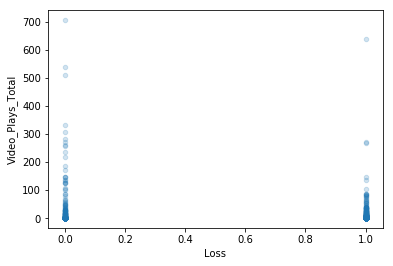

In [41]:
Trimmed_Total_Plays.plot(kind='Scatter', x='Loss', y='Video_Plays_Total', alpha=.2);

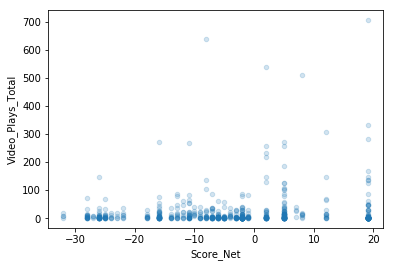

In [42]:
Trimmed_Total_Plays.plot(kind='Scatter', x='Score_Net', y='Video_Plays_Total', alpha=.2);

C:\Users\mail\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


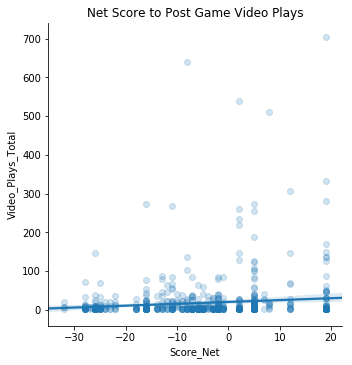

In [43]:
g = sns.lmplot(x='Score_Net',
               y='Video_Plays_Total',
               data=Trimmed_Total_Plays,
               scatter_kws={'alpha':0.2},
               );
g.ax.set_title('Net Score to Post Game Video Plays');

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

feature_cols = ['Score_Net']

X = Trimmed_Total_Plays.loc[:, feature_cols]
y = Trimmed_Total_Plays.loc[:, 'Video_Plays_Total']

lr.fit(X, y)

print(lr.intercept_)
print(lr.coef_)

20.266404961080376
[0.48080334]


In [45]:
from sklearn.linear_model import LinearRegression

lr_2 = LinearRegression()

feature_cols = ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo']

X = Trimmed_Total_Plays.loc[:, feature_cols]
y = Trimmed_Total_Plays.loc[:, 'Video_Plays_Total']

lr_2.fit(X, y)

print(lr_2.intercept_)
print(lr_2.coef_)

50.334902183378325
[ 0.14208062 -4.06075485 -2.66441486 15.06150513 -0.84900783  3.47019838
 -0.0245451 ]


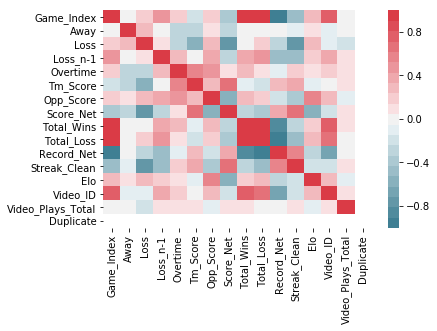

In [46]:
sns.heatmap(Trimmed_Total_Plays.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            );

In [47]:
null_pred = np.zeros(y.shape)
null_pred += np.mean(y)

null_rmse = np.sqrt(metrics.mean_squared_error(null_pred, y))
null_rmse

NameError: name 'metrics' is not defined

In [48]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures

kf = KFold(n_splits=5, shuffle=True)

for poly_degree in range(1, 11):
    pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = pf.fit_transform(X)
    lr = LinearRegression()
    score = -cross_val_score(lr, X_poly, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(score)
    rmse = np.mean(rmse_scores)
    print(poly_degree, rmse)

1 53.88333725850573
2 52.88655331242874
3 54.55395050695201
4 54.22765361668532
5 54.337417180385344
6 54.971204115193416
7 55.80284880272704
8 54.17153350540391
9 67.84268977469529
10 53.44632022659598


In [54]:
kf = KFold(n_splits=5, shuffle=True)

np.mean(np.sqrt(-cross_val_score(lr, X_poly, y, cv=kf, scoring='neg_mean_squared_error')))

54.06178788263048

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def train_test_MSGN(df, feature_cols):
    X = Trimmed_Total_Plays.loc[:, feature_cols]
    y = Trimmed_Total_Plays.loc[:, 'Video_Plays_Total']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    lr_2.fit(X_train, y_train)
    
    y_pred = lr_2.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(train_test_MSGN(Full_Game_Video, ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo', 'Game_Index']))
print(train_test_MSGN(Full_Game_Video, ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo']))
print(train_test_MSGN(Full_Game_Video, ['Score_Net', 'Loss', 'Overtime', 'Record_Net', 'Streak_Clean']))
print(train_test_MSGN(Full_Game_Video, ['Score_Net', 'Loss', 'Overtime']))


60.405080896491285
60.71403231012191
67.80714137673068
41.58955477582522


In [55]:
from sklearn.ensemble import RandomForestRegressor

feature_cols = ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo']

X = Trimmed_Total_Plays.loc[:, feature_cols]
y = Trimmed_Total_Plays.loc[:, 'Video_Plays_Total']

rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True)

rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=True,
           random_state=None, verbose=0, warm_start=False)

In [56]:
pd.DataFrame(
    {'feature': feature_cols, 'importance': rfreg.feature_importances_}
).sort_values('importance', ascending=False)

,feature,importance
4,Record_Net,0.407191
0,Score_Net,0.200633
6,Elo,0.141749
2,Overtime,0.094493
5,Streak_Clean,0.078416
1,Loss,0.041746
3,Loss_n-1,0.035773


In [57]:
rfreg.oob_score_

0.038960401553050805

In [58]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10, shuffle=True)
scores = -cross_val_score(rfreg, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(scores)
rmse = np.mean(rmse_scores)
rmse

50.46797726082583

In [59]:
Game_Total_Plays = Trimmed_Total_Plays.groupby('Game_Index')['Video_Plays_Total'].sum().to_frame()

Plays_By_Game = pd.merge(Trimmed_Total_Plays, Game_Total_Plays, on='Game_Index')

Plays_By_Game

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,...,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Video_ID,Video_Plays_Total_x,Duplicate,Video_Plays_Total_y
0,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450217995001,1,False,541
1,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450266286001,1,False,541
2,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450279763001,1,False,541
3,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450376272001,1,False,541
4,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450391556001,1,False,541
5,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450471929001,1,False,541
6,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450481706001,1,False,541
7,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450562754001,1,False,541
8,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450584470001,1,False,541
9,2,7:30p,1,Nets,1,0,0,105,107,-2,...,1,0,-1,1466,39-43,2018-10-19,5450604889001,1,False,541


In [60]:
Plays_By_Game = Plays_By_Game.drop(['Video_Plays_Total_x', 'Video_ID'], axis='columns')
Plays_By_Game

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Duplicate,Video_Plays_Total_y
0,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
1,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
2,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
3,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
4,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
5,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
6,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
7,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
8,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
9,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541


In [61]:
Plays_By_Game.sort_values('Game_Index', inplace=True)
Plays_By_Game

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Duplicate,Video_Plays_Total_y
90,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
108,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
109,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
110,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
111,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
112,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
113,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
114,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
115,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
116,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614


In [62]:
Plays_By_Game.loc[:, 'Duplicate'] = Plays_By_Game.duplicated(subset='Game_Index', keep='first')
Plays_By_Game

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Duplicate,Video_Plays_Total_y
90,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
108,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614
109,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614
110,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614
111,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614
112,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614
113,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614
114,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614
115,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614
116,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,True,1614


In [63]:
Plays_By_Game = Plays_By_Game.loc[Plays_By_Game.loc[:, 'Duplicate'] == False, :]
Plays_By_Game

,Game_Index,Start_Time,Away,Opponent,Loss,Loss_n-1,Overtime,Tm_Score,Opp_Score,Score_Net,Total_Wins,Total_Loss,Record_Net,Streak_Clean,Elo,Opponent_Record,Game_Date,Duplicate,Video_Plays_Total_y
90,1,7:30p,0,Hawks,0,0,0,126,107,19,1,0,1,1,1340,27-55,2018-10-17,False,1614
83,2,7:30p,1,Nets,1,0,0,105,107,-2,1,1,0,-1,1466,39-43,2018-10-19,False,541
171,3,7:30p,0,Celtics,1,1,0,101,103,-2,1,2,-1,-2,1672,53-29,2018-10-20,False,95
182,4,8:00p,1,Bucks,1,1,0,113,124,-11,1,3,-2,-3,1666,60-22,2018-10-22,False,249
238,5,7:30p,1,Heat,1,1,0,87,110,-23,1,4,-3,-4,1465,36-46,2018-10-24,False,31
222,6,7:30p,0,Warriors,1,1,0,100,128,-28,1,5,-4,-5,1802,61-21,2018-10-26,False,190
214,7,7:30p,0,Nets,0,1,0,115,96,19,2,5,-3,1,1466,39-43,2018-10-29,False,1160
269,8,8:00p,0,Pacers,1,0,0,101,107,-6,2,6,-4,-1,1572,47-35,2018-10-31,False,230
290,9,8:30p,1,Mavericks,0,1,0,118,106,12,3,6,-3,1,1489,36-46,2018-11-02,False,696
303,10,6:00p,1,Wizards,1,0,0,95,108,-13,3,7,-4,-1,1534,37-45,2018-11-04,False,312


In [64]:
Plays_By_Game.shape

(46, 19)

In [65]:
y = Plays_By_Game.loc[:, 'Video_Plays_Total_y']

null_pred = np.zeros(y.shape)
null_pred += np.mean(y)

null_rmse = np.sqrt(metrics.mean_squared_error(null_pred, y))
null_rmse

381.09807332677997

In [66]:
lr_3 = LinearRegression()

def train_test_MSGN_2(df, feature_cols):
    X = Plays_By_Game.loc[:, feature_cols]
    y = Plays_By_Game.loc[:, 'Video_Plays_Total_y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    lr_3.fit(X_train, y_train)
    
    y_pred = lr_3.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(train_test_MSGN_2(Plays_By_Game, ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo', 'Game_Index']))
print(train_test_MSGN_2(Plays_By_Game, ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo']))
print(train_test_MSGN_2(Plays_By_Game, ['Score_Net', 'Loss', 'Overtime', 'Record_Net', 'Streak_Clean']))
print(train_test_MSGN_2(Plays_By_Game, ['Score_Net', 'Loss', 'Overtime']))

258.33878211272264
292.4205625002824
357.19559255519897
405.17833772405845


In [67]:
rfreg_2 = RandomForestRegressor(n_estimators=150, max_features=6, oob_score=True)

feature_cols = ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo', 'Game_Index']

X = Plays_By_Game.loc[:, feature_cols]
y = Plays_By_Game.loc[:, 'Video_Plays_Total_y']

rfreg_2.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=True,
           random_state=None, verbose=0, warm_start=False)

In [68]:
pd.DataFrame(
    {'feature': feature_cols, 'importance': rfreg_2.feature_importances_}
).sort_values('importance', ascending=False)

,feature,importance
0,Score_Net,0.301481
5,Streak_Clean,0.179566
6,Elo,0.140925
4,Record_Net,0.129793
7,Game_Index,0.125430
1,Loss,0.102118
3,Loss_n-1,0.011902
2,Overtime,0.008785


In [69]:
rfreg_2.oob_score_

0.4487324883655527

In [70]:
kf = KFold(n_splits=3, shuffle=True)
scores = -cross_val_score(rfreg_2, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(scores)
rmse = np.mean(rmse_scores)
rmse

264.2194932020613

In [71]:
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfreg_3 = RandomForestRegressor(n_estimators=150, max_features=feature)
    MSE_scores = cross_val_score(rfreg_3, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

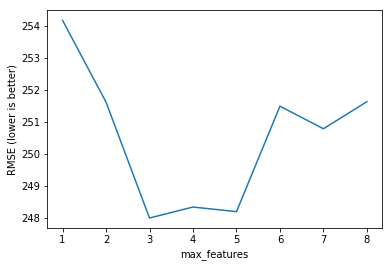

In [72]:
# Plot max_features (x-axis) versus RMSE (y-axis).
fig, ax = plt.subplots()
ax.plot(feature_range, RMSE_scores);
ax.set_xlabel('max_features');
ax.set_ylabel('RMSE (lower is better)');

In [73]:
feature_cols = ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo']

X = Plays_By_Game.loc[:, feature_cols]
y = Plays_By_Game.loc[:, 'Video_Plays_Total_y']

rfreg_4 = RandomForestRegressor(n_estimators=150, max_features=2, oob_score=True)

rfreg_4.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=True,
           random_state=None, verbose=0, warm_start=False)

In [74]:
pd.DataFrame(
    {'feature': feature_cols, 'importance': rfreg_4.feature_importances_}
).sort_values('importance', ascending=False)

,feature,importance
0,Score_Net,0.237563
5,Streak_Clean,0.199753
4,Record_Net,0.199570
1,Loss,0.171587
6,Elo,0.146530
2,Overtime,0.024063
3,Loss_n-1,0.020934


In [75]:
rfreg_4.oob_score_

0.47315072921864487

In [76]:
kf = KFold(n_splits=10, shuffle=True)

scores = -cross_val_score(rfreg_4, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(scores)
rmse = np.mean(rmse_scores)
rmse

232.17931840427678

In [77]:
Plays_By_Game.loc[:, 'Start_Time'] = Plays_By_Game.loc[:, 'Start_Time'].map

C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [78]:
Plays_By_Game.dtypes

Game_Index                      int64
Start_Time             datetime64[ns]
Away                            int64
Opponent                       object
Loss                            int64
Loss_n-1                        int64
Overtime                        int64
Tm_Score                        int64
Opp_Score                       int64
Score_Net                       int64
Total_Wins                      int64
Total_Loss                      int64
Record_Net                      int64
Streak_Clean                    int64
Elo                             int64
Opponent_Record                object
Game_Date              datetime64[ns]
Duplicate                        bool
Video_Plays_Total_y             int64
dtype: object

In [79]:
kf = KFold(n_splits=10, shuffle=True)

feature_cols = ['Score_Net', 'Loss', 'Overtime', 'Loss_n-1', 'Record_Net', 'Streak_Clean', 'Elo', 'Start_Time']

X = Plays_By_Game.loc[:, feature_cols]
y = Plays_By_Game.loc[:, 'Video_Plays_Total_y']

rfreg_4 = RandomForestRegressor(n_estimators=150, max_features=2, oob_score=True)

rfreg_4.fit(X, y)

print(pd.DataFrame(
    {'feature': feature_cols, 'importance': rfreg_4.feature_importances_}
).sort_values('importance', ascending=False))

print(rfreg_4.oob_score_)

scores = -cross_val_score(rfreg_4, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(scores)
rmse = np.mean(rmse_scores)
print(rmse)

TypeError: float() argument must be a string or a number, not 'Timestamp'